8 features, 100+ rows

---
# title: CET2061 - Machine Learning Practicum
# author: Chong Wei Sheng
# date: last-modified
format:
 html:
   code-fold: true
   collapse: false
toc: true
toc-depth: 2 
number-sections: true
version: 0.5
---

## Submission Requirement: 

One Practicum; deadline: 12 pm (noon), 1st July 2024 (day 13 of the module)

Zip together the following files: 
- <b>CET2061_Practicum_Submission_<font color="FF0000">Your_Name</font>.ipynb</b>.
- <b>Your created dataset file (in .csv) in Part 2</b>

Ensure that when your zipped file is extracted, your <b> CET2061_Practicum_Submission_<font color="FF0000">Your_Name</font>.ipynb </b>can run without any errors, particularly <u>FileNotFoundError</u>. Please double check before submitting. Failure to do so will result in a Not Yet Competent (NYC).

<hr style="border-color: black; height: 0.1px">

# Part 1. Gradient Boosting, Explain

# Part 2. Your Own Function, Crack

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
)
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

from typing import Dict, List

## Prepare data

In [2]:
import sys
import os

# Suppress output
sys.stdout = open(os.devnull, 'w')

%pip install --quiet matplotlib
%pip install --quiet pandas
%pip install --quiet seaborn
%pip install --quiet scikit-learn

# Re-enable output
sys.stdout = sys.__stdout__

In [3]:
import matplotlib.pyplot as plt

# Suppress specific sklearn warnings
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

warnings.filterwarnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

### Generate feature using custom function

In [4]:
# NUM_FEATURE = 8
# NUM_SAMPLE = 200

SEED = 123
np.random.seed(SEED)

# # Generate array with 200 rows and 8 columns using numpy.random.normal
# array = np.random.randint(low=-1234, high=1234, size=NUM_SAMPLE * NUM_FEATURE).reshape(
#     NUM_SAMPLE, -1
# )
# assert (array == 0).any() == False

# features = pd.DataFrame(array, columns=[f"x{n+1}" for n in range(NUM_FEATURE)])
# features = features.map(lambda x: int(x))
# # assert (features != 0).all().all()
# features.head()
# # assert features.any()
# # features.where(features == 0)

# # # # _ = plt.boxplot(features)

In [5]:
# Define the function f
def calculate_f(CT, SP, ST, R, MS, MWS, NR, A):
    term1 = (np.exp(CT + 1) / np.log2((SP + 5) / 3)) + (ST + 1) / (R + 1)
    term2 = MS * MWS / (NR + 1)
    f = term1 * MS + term2 - A
    return f


# Generate random data
num_samples = 1000
np.random.seed(42)
new_df = {
    "Customer Type (CT)": np.random.choice([0, 1], size=num_samples),
    "Subscription Plan (SP)": np.random.choice([0, 1, 2], size=num_samples),
    "Support Tickets Raised (ST)": np.random.randint(0, 6, size=num_samples),
    "Region (R)": np.random.choice([0, 1, 2, 3], size=num_samples),
    "Age (A)": np.random.randint(18, 66, size=num_samples),
    "Monthly Spend (MS)": np.random.randint(10, 501, size=num_samples),
    "Months with Service (MWS)": np.random.randint(1, 61, size=num_samples),
    "Number of Referrals (NR)": np.random.randint(0, 21, size=num_samples),
}

# Calculate f for each sample
new_df["f_values"] = calculate_f(
    new_df["Customer Type (CT)"],
    new_df["Subscription Plan (SP)"],
    new_df["Support Tickets Raised (ST)"],
    new_df["Region (R)"],
    new_df["Monthly Spend (MS)"],
    new_df["Months with Service (MWS)"],
    new_df["Number of Referrals (NR)"],
    new_df["Age (A)"],
)

df_generated = pd.DataFrame(new_df)

features = df_generated.iloc[:, :-1]
y = df_generated.iloc[:, -1]
display(df_generated.head())

,Customer Type (CT),Subscription Plan (SP),Support Tickets Raised (ST),Region (R),Age (A),Monthly Spend (MS),Months with Service (MWS),Number of Referrals (NR),f_values
0,0,1,3,2,46,388,54,19,2573.626683
1,1,2,4,0,62,207,20,19,2431.263167
2,0,0,4,3,52,10,30,14,17.384786
3,0,0,0,2,57,416,38,3,5568.073767
4,0,0,1,3,31,387,3,8,1718.941221


accuracy train, test 0.9

$$
\begin{align}
f(x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8) 
&= x_1 \cdot \sin(x_2) + \log(\lvert x_3 \rvert + 1) \cdot \cos(x_4)  \\
&+ 10*\cos(x_5 - x_6) \\
&+42*\sin\left(x_7 \cdot \log(\lvert x_8 \rvert + 1)\right)
\end{align}
$$

In [6]:
# import math


# def complex_function(x: np.array) -> float:
#     [x1, x2, x3, x4, x5, x6, x7, x8] = list(x)
#     # term1 = x1 * math.sin(x2)
#     # term1 = x1 + x2 + x3
#     term1 = (x1 / (2 * x2)) - 3 * x3 + x4 + x5 / x6 + (7.7 * x7 / x8)
#     # term2 = math.log(abs(x3) + 1) * math.cos(x4)
#     # term3 = 1  # 10 * math.cos(x5 - x6)
#     # term4 = 1  # 42 * math.sin(x7 * math.log(abs(x8) + 1))
#     # return (term4 + term1 - term2) / term3
#     return term1


# # complex_function(features.iloc[1, :])

# y = features.apply(lambda row: complex_function(row[:9]), axis="columns")
# xy = pd.concat([features, y], axis="columns")
# xy.columns = [*features.columns, "y_train"]
# xy.to_csv(f"./xy_R2_col_{NUM_FEATURE}_row_{NUM_SAMPLE}_seed_{SEED}.csv", index=False)

# print(xy.shape)
# xy.head()

## 2.4 Train

In [7]:
splited = train_test_split(
    features.to_numpy(),
    np.array(y).reshape(-1, 1),
    test_size=0.3,
    random_state=SEED,
    shuffle=True,
)
# for i, c in enumerate(splited):
#     print(c.shape)

X_tr, X_te, y_tr, y_te = splited

### Setup a consistent pipeline

#### Placeholder pipeline

In [8]:
pipe = Pipeline([("scaler", StandardScaler()), ("regressor", Lasso())])

#### Grid search strategy

key 0 regressor_no_alpha
#df_results.mean_test_score.max() 0.6291435127473595 

r2 test:  0.5845610832685342
r2 train:  0.6393047718158889
key 1 regressor_l1
#df_results.mean_test_score.max() 0.6294050711060167 

r2 test:  0.588977186127529
r2 train:  0.6389525525060908
key 2 ensemble_without_learning_rate
#df_results.mean_test_score.max() 0.7522981714324395 

r2 test:  0.7427374665449082
r2 train:  0.8223271617293714
key 3 ensemble_with_learning_rate
#df_results.mean_test_score.max() 0.9431606598475064 

r2 test:  0.9480409913205419
r2 train:  0.9964943673011502
------------
combine max 0.9431606598475064
Note: you may need to restart the kernel to use updated packages.
zsh:1: 4.2.0 not found
Note: you may need to restart the kernel to use updated packages.


,params,mean_test_score
2,"[MaxAbsScaler(), LinearRegression()]",0.629144
0,"[StandardScaler(), LinearRegression()]",0.629144


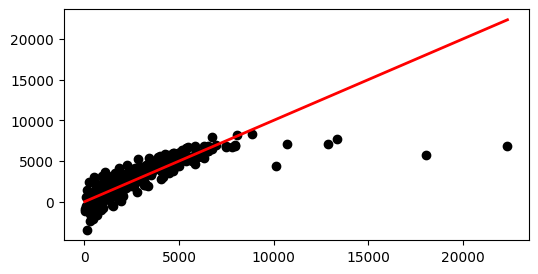

,params,mean_test_score
11,"[RobustScaler(), 10, Lasso()]",0.629405
8,"[StandardScaler(), 10, Lasso()]",0.629388


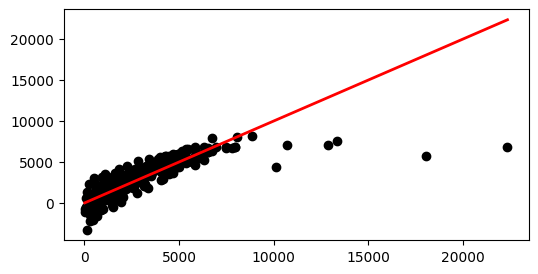

,params,mean_test_score
1,"[MinMaxScaler(), AdaBoostRegressor()]",0.752298
3,"[RobustScaler(), AdaBoostRegressor()]",0.748383


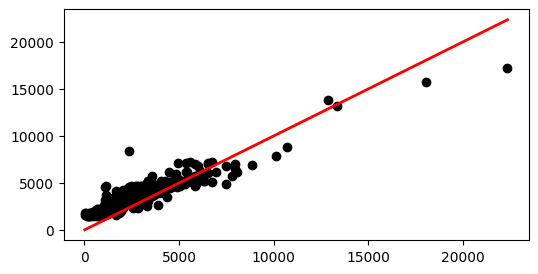

,params,mean_test_score
20,"[MinMaxScaler(), 200, 3, 0.1, GradientBoosting...",0.943161
36,"[MaxAbsScaler(), 200, 5, 0.1, GradientBoosting...",0.930388


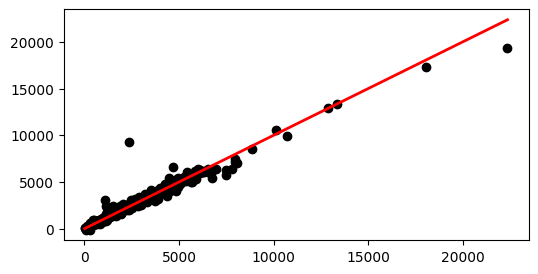

,params,mean_test_score
36,"[MaxAbsScaler(), 200, 5, 0.1, GradientBoosting...",0.930388
20,"[MinMaxScaler(), 200, 3, 0.1, GradientBoosting...",0.943161


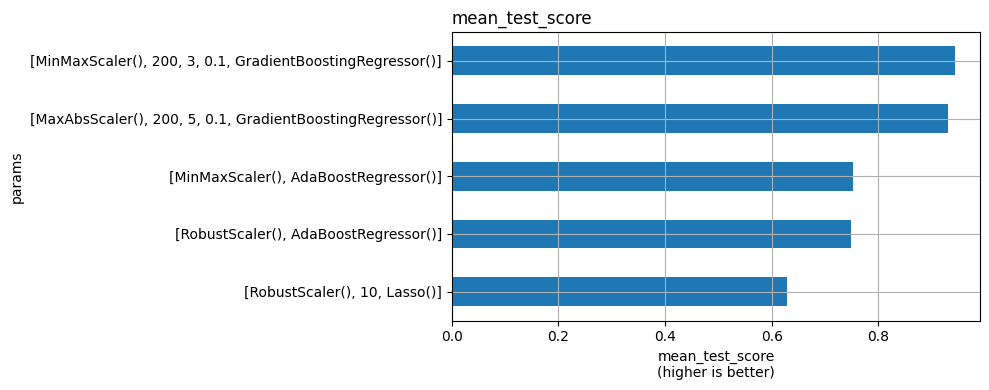

In [9]:
param_dict = {
    "regressor_no_alpha": {"regressor": [LinearRegression()]},
    "regressor_l1": {"regressor": [Lasso()], "regressor__alpha": [0.1, 1, 10]},
    # "regressor_l2": {"regressor": [Ridge()], "regressor__alpha": [0.1, 1, 10]},
    "ensemble_without_learning_rate": {
        "regressor": [AdaBoostRegressor()],
    },
    "ensemble_with_learning_rate": {
        "regressor": [GradientBoostingRegressor()],
        "regressor__n_estimators": [50, 100, 200],
        "regressor__learning_rate": [0.01, 0.05, 0.1],
        "regressor__max_depth": [3, 5, 7],
    },
}

verbose = 0
n_iter = 40
cv_fold = 5


def print_results(cv_results_):
    df_results = pd.DataFrame(cv_results_)
    df_results.sort_values(by="rank_test_score", inplace=True)
    top_10 = df_results
    top_10.params = top_10.params.apply(lambda x: [v for v in x.values()])
    best2 = top_10[["params", "mean_test_score"]].head(2)
    display(best2)

    print(
        "#df_results.mean_test_score.max()",
        df_results.mean_test_score.max(),
        "\n",
    )

    return best2


cv_results: List = []
best_params_scores: Dict = {}
for i, key in enumerate(param_dict.keys()):
    print("key", i, key)
    param_grid = {
        "scaler": [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()],
    }
    param_grid.update(param_dict[key])

    searchcv = RandomizedSearchCV(
        pipe,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv_fold,
        verbose=verbose,
        random_state=SEED,
        n_jobs=-1,
    )

    searchcv.fit(X_tr, y_tr.ravel())
    cv_results.append(print_results(searchcv.cv_results_))
    # best_params_scores[key] = {
    #     "best_score_": searchcv.best_score_,
    #     "searchcv": searchcv,
    # }
    # validate
    y_pred = searchcv.best_estimator_.predict(X_te)
    print(f"r2 test: ", r2_score(y_te, y_pred))
    print(f"r2 train: ", r2_score(y_tr, searchcv.best_estimator_.predict(X_tr)))
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.scatter(y_te, y_pred, c="k")
    ax.plot([y.min(), y.max()], [y.min(), y.max()], "r", lw=2)
    plt.show()
    print("==========================")


df_best = pd.DataFrame.from_dict(best_params_scores)
top_10: pd.DataFrame = pd.concat(cv_results, axis=0)
top_10.sort_values(by="mean_test_score", inplace=True)
print("------------")
print("combine max", top_10.mean_test_score.max())
display(top_10.tail(n=2))
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
top_10.tail().plot(x="params", y="mean_test_score", kind="barh", ax=ax)
plt.grid(visible=True, which="both")
plt.xlabel("mean_test_score\n(higher is better)")
plt.title("mean_test_score", loc="left")
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

### Setup search grid, then search

## Predict

In [10]:
### Check result

# extract coefficients

In [11]:
%pip install plotly
%pip install nbformat>=4.2.0

## 2.5 feature_importances_

## Evaluation
### 2.6 Accuracy

## Explanation
understanding and explanation about this statement: “Essentially, supervised machine learning is just to establish the relationship between input (𝑥) and output (𝑦).”
Part 3.

# Part 3. Any Data, Any Model, Soar

## Data

## Gradient boosting

## Linear Regression

## Linear Regressor